# prediction plot

In [1]:
import numpy as np

In [2]:
act1_kp = []
act2_kp = []
for i in range(1,271):
    f1 = np.load(f'./demo/model_outputs_3d/act_1/output_np{i}.npy')
    act1_kp.append(f1)
for i in range(1,241):
    f2 = np.load(f'./demo/model_outputs_3d/act_2/output_np{i}.npy')
    act2_kp.append(f2)
    
flag_act1_kp_changed = False
flag_act2_kp_changed = False

In [3]:
# 받아온 act_kp 의 위치를 ground truth 와 같게 수정한다.

for i in range( len(act1_kp) ):
    if flag_act1_kp_changed:
        print('Has already done.')
        break
    
    norm_val = np.repeat( act1_kp[i][0][-1], 17 )
    norm_val = norm_val[:, np.newaxis]
    zero_man = np.zeros( [17,2] )
    regularization_vals = np.concatenate((zero_man, norm_val), axis=1)
    
    act1_kp[i] -= regularization_vals
flag_act1_kp_changed = True
    
for i in range( len(act2_kp) ):
    if flag_act2_kp_changed:
        print('Has already done.')
        break
    
    norm_val = np.repeat( act2_kp[i][0][-1], 17 )
    norm_val = norm_val[:, np.newaxis]
    zero_man = np.zeros( [17,2] )
    regularization_vals = np.concatenate((zero_man, norm_val), axis=1)
    
    act2_kp[i] -= regularization_vals
flag_act2_kp_changed = True

In [4]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import axes3d
import numpy as np


def plot3Dpose(vals):
    """
    vals : (keypoints=17 xyz=3)
    """
    
    fig = plt.figure()
    ax = fig.gca(projection='3d')
    ax.view_init(elev=15., azim=70)
    
    # bone pairs
    I = np.array( [0, 0, 1, 4, 2, 5, 0, 7,  8,  8, 14, 15, 11, 12, 8,  9])
    J = np.array( [1, 4, 2, 5, 3, 6, 7, 8, 14, 11, 15, 16, 12, 13, 9, 10])
    
    for i in np.arange(len(I)):
        x ,y ,z = [np.array( [vals[I[i],j], vals[J[i],j]] ) for j in range(3)]
        # x: (I,J 포인트에 해당하는 bone_x좌표) = (두개의 kp x좌표)
        ax.plot(x, y, z, lw=2)  # bone
        ax.scatter(x, y, z)     # dot
    ax.scatter(0,0,0, c='black')
    
    ax.set_xlabel('x axis')
    ax.set_ylabel('y axis')
    ax.set_zlabel('z axis')
    
    RADIUS = 0.8

    ax.set_xlim3d([-RADIUS, RADIUS])
    ax.set_ylim3d([-RADIUS, RADIUS])
    # ax.set_aspect('equal')
    ax.set_aspect('auto')

    white = (1.0, 1.0, 1.0, 0.0)
    ax.xaxis.set_pane_color(white) 
    ax.yaxis.set_pane_color(white)
    ax.zaxis.set_pane_color(white)

    ax.tick_params('x', labelbottom = False)
    ax.tick_params('y', labelleft = False)
    ax.tick_params('z', labelleft = False)

/tmp/ipykernel_23974/4218050118.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


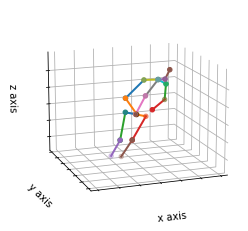

In [5]:
plot3Dpose(act1_kp[10])
# print(act1_kp[1])

# GT plot


In [6]:
import pandas as pd
import numpy as np

In [7]:
act1_gt_rawdata = pd.read_csv('~/Desktop/act_gt/exp1.csv')
act2_gt_rawdata = pd.read_csv('~/Desktop/act_gt/exp2.csv')

In [8]:
act1_gt_rawdata.columns

Index(['Timestamps [ms]', 'RightFootEE', 'Unnamed: 2', 'Unnamed: 3',
       'RightToeBase', 'Unnamed: 5', 'Unnamed: 6', 'RightFoot', 'Unnamed: 8',
       'Unnamed: 9', 'RightLeg', 'Unnamed: 11', 'Unnamed: 12', 'RightUpLeg',
       'Unnamed: 14', 'Unnamed: 15', 'LeftFootEE', 'Unnamed: 17',
       'Unnamed: 18', 'LeftToeBase', 'Unnamed: 20', 'Unnamed: 21', 'LeftFoot',
       'Unnamed: 23', 'Unnamed: 24', 'LeftLeg', 'Unnamed: 26', 'Unnamed: 27',
       'LeftUpLeg', 'Unnamed: 29', 'Unnamed: 30', 'RightHandEE', 'Unnamed: 32',
       'Unnamed: 33', 'RightHand', 'Unnamed: 35', 'Unnamed: 36',
       'RightForeArm', 'Unnamed: 38', 'Unnamed: 39', 'RightArm', 'Unnamed: 41',
       'Unnamed: 42', 'RightShoulder', 'Unnamed: 44', 'Unnamed: 45',
       'LeftHandEE', 'Unnamed: 47', 'Unnamed: 48', 'LeftHand', 'Unnamed: 50',
       'Unnamed: 51', 'LeftForeArm', 'Unnamed: 53', 'Unnamed: 54', 'LeftArm',
       'Unnamed: 56', 'Unnamed: 57', 'LeftShoulder', 'Unnamed: 59',
       'Unnamed: 60', 'HeadEE', 'Un

### points table ###

sttf_coor   gt_idx  gt_name         gt_csv_idx 

10          22      HeadEE          61
9           23      Head            64
8           24      Neck            67
7           27      Spine2          76
0           30      Hips            85

14          15      RightShoulder   43
15          13      RightArm        40
16          11      RightHand       34
11          21      LeftShoulder    58
12          19      LeftArm         55
13          17      LeftHand        49

1           5       RightUpLeg      13
2           4       RightLeg        10
3           3       RightFoot       7
4           9       LeftUpLeg       28
5           8       LeftLeg         25
6           7       LeftFoot        22

## matching GT coordinates into STTF coordinates form

- core 좌표가 움직이지 x
- noramlize 해주었다.
    - bone length 를 계산한 뒤, 그 비율로 좌표들을 shrink 시키려 한다.

In [9]:
# Column names -- predicted output & ground truth matching
if True:    # just wanted to zip these lines
    col10 = ['HeadEE', 'Unnamed: 62', 'Unnamed: 63']    # remove 대상
    col9 = ['Head', 'Unnamed: 65', 'Unnamed: 66']
    col8 = ['Neck', 'Unnamed: 68', 'Unnamed: 69']
    col7 = ['Spine2', 'Unnamed: 77', 'Unnamed: 78']
    col0 = ['Hips', 'Unnamed: 86', 'Unnamed: 87']
    col14 = ['RightArm', 'Unnamed: 41', 'Unnamed: 42']
    col15 = ['RightForeArm', 'Unnamed: 38', 'Unnamed: 39']
    col16 = ['RightHand', 'Unnamed: 35', 'Unnamed: 36']
    col11 = ['LeftArm', 'Unnamed: 56', 'Unnamed: 57']
    col12 = ['LeftForeArm', 'Unnamed: 53', 'Unnamed: 54']
    col13 = ['LeftHand', 'Unnamed: 50', 'Unnamed: 51']
    col1 = ['RightUpLeg', 'Unnamed: 14', 'Unnamed: 15']
    col2 = ['RightLeg', 'Unnamed: 11', 'Unnamed: 12']
    col3 = ['RightFoot', 'Unnamed: 8', 'Unnamed: 9']
    col4 = ['LeftUpLeg', 'Unnamed: 29', 'Unnamed: 30']
    col5 = ['LeftLeg', 'Unnamed: 26', 'Unnamed: 27']
    col6 = ['LeftFoot', 'Unnamed: 23', 'Unnamed: 24']

    columns = []
    columns.append(col0)
    columns.append(col1)
    columns.append(col2)
    columns.append(col3)
    columns.append(col4)
    columns.append(col5)
    columns.append(col6)
    columns.append(col7)
    columns.append(col8)
    columns.append(col9)
    columns.append(col10)   # remove 대상
    columns.append(col11)
    columns.append(col12)
    columns.append(col13)
    columns.append(col14)
    columns.append(col15)
    columns.append(col16)


# mapping coordinates into STTF output form.

act1_gt = []
for frame_idx in range(len(act1_gt_rawdata)): ## 270
    pose_per_frame = []
    core_coord = 0
    for i in range(len(columns)):
        tmp = act1_gt_rawdata[columns[i]].iloc[frame_idx].to_list()  # act1_gt 의 특정 point를 frame으로 접근함
        if i==0:
            core_coord = tmp   # fixing the GT coord
        tmp = [t - c for t,c in zip(tmp,core_coord)]    # subtract core coord
        pose_per_frame.append(tmp)
    act1_gt.append(np.array(pose_per_frame))


act2_gt = []
for frame_idx in range(len(act2_gt_rawdata)): ## 270
    pose_per_frame = []
    core_coord = 0
    for i in range(len(columns)):
        tmp = act2_gt_rawdata[columns[i]].iloc[frame_idx].to_list()  # act1_gt 의 특정 point를 frame으로 접근함
        if i==0:
            core_coord = tmp   # fixing the GT coord
        tmp = [t - c for t,c in zip(tmp,core_coord)]    # subtract core coord
        pose_per_frame.append(tmp)
    act2_gt.append(np.array(pose_per_frame))

In [10]:
act1_gt

[array([[   0.    ,    0.    ,    0.    ],
        [  79.065 ,   22.98  ,   15.69  ],
        [ 212.4725,  261.411 , -192.29  ],
        [ 352.885 ,  429.943 , -451.23  ],
        [ -63.038 ,   29.012 ,  -47.01  ],
        [  56.2652,  266.138 , -264.82  ],
        [ 195.271 ,  426.659 , -529.55  ],
        [ -83.016 , -117.524 ,  173.99  ],
        [-199.016 , -208.767 ,  413.46  ],
        [-239.929 , -208.227 ,  479.29  ],
        [-325.457 , -237.377 ,  605.3   ],
        [-326.663 , -163.478 ,  303.39  ],
        [-299.484 , -128.383 ,   56.35  ],
        [-188.128 ,   37.098 ,  145.89  ],
        [ -38.661 , -193.547 ,  467.72  ],
        [ 108.8403,  -90.428 ,  292.77  ],
        [  19.19  ,   95.385 ,  220.4   ]]),
 array([[   0.    ,    0.    ,    0.    ],
        [  78.813 ,   23.391 ,   16.34  ],
        [ 211.8398,  262.207 , -191.44  ],
        [ 351.992 ,  429.716 , -451.19  ],
        [ -62.853 ,   28.774 ,  -47.41  ],
        [  55.625 ,  266.62  , -264.88  ],
        [

In [11]:
act1_kp[200]

array([[ 0.        ,  0.        ,  0.        ],
       [ 0.11751517, -0.00316244,  0.02459741],
       [ 0.2837155 ,  0.10318759, -0.27632415],
       [ 0.28691316, -0.18543738, -0.552584  ],
       [-0.11750814,  0.0031164 , -0.02461237],
       [ 0.09630652,  0.10917841, -0.29987472],
       [ 0.1141412 , -0.13554275, -0.57644874],
       [-0.07776964,  0.02627394,  0.23827773],
       [-0.14057446,  0.03995579,  0.49416512],
       [-0.15995508,  0.13328415,  0.56990546],
       [-0.18927342,  0.12252074,  0.67208344],
       [-0.2727557 ,  0.01990908,  0.45223254],
       [-0.4149313 ,  0.24541155,  0.45344728],
       [-0.35494065,  0.39801162,  0.6325254 ],
       [ 0.00996931,  0.07963139,  0.49396735],
       [ 0.03191777,  0.3835801 ,  0.5482785 ],
       [-0.15709028,  0.43630612,  0.67661434]], dtype=float32)

In [12]:
# np.sum(np.sqrt(np.sum(np.power(act1_gt[200] - act1_kp[200]*903, 2), axis=1)))

## 2. Normalize the GT coordinates 


/tmp/ipykernel_23974/4218050118.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')
/tmp/ipykernel_23974/4218050118.py:12: MatplotlibDeprecationWarning: Calling gca() with keyword arguments was deprecated in Matplotlib 3.4. Starting two minor releases later, gca() will take no keyword arguments. The gca() function should only be used to get the current axes, or if no axes exist, create new axes with default keyword arguments. To create a new axes with non-default arguments, use plt.axes() or plt.subplot().
  ax = fig.gca(projection='3d')


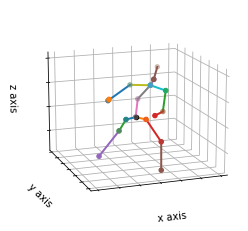

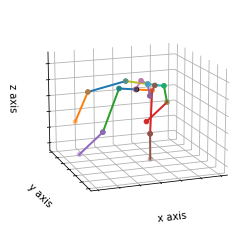

In [13]:
i = 100

# X = np.repeat(np.array([-1.,-1.,-1]),17).reshape(17,3)
# conjugated_kp = np.multiply(act1_kp[i],X)

%matplotlib inline
plot3Dpose(act2_gt[i]/700)
plot3Dpose(act2_kp[i]*1.5)

# 문제점



In [17]:
# # test

# a = np.array([2,5,3])   # expected L2-distance: "6.1644"
# b = np.array([1,1,1])   # expected L2-distance: "1.7320"
# np.linalg.norm(b)

# 3. 계산하지 않을 joint 제거

In [14]:
# "HeadEE"제거
del1_HeadEE_idx = 10

act1_kp_deleted=[]
for i in range(len(act1_kp)):
    act1_kp_deleted.append(np.delete(act1_kp[i], (del1_HeadEE_idx), axis=0))

act2_kp_deleted=[]
for i in range(len(act2_kp)):
    act2_kp_deleted.append(np.delete(act2_kp[i], (del1_HeadEE_idx), axis=0))

print(act1_kp_deleted[0].shape, len(act1_kp_deleted))

(16, 3) 270


## MPJPE 계산

MPJPE (Mean Per Joint Position Error) : Mean of euclidean distance between ground-truth and prediction.

#### Scaling Predicted Skeleton

gt와 prediction이 서로 다른 좌표계이다. (Hips--Spine2) 가 가장 서로다른 좌표계의 bias가 적다 판단하여, gt의 (Hips--Spine2) Euclidian distance 와, prediction의 (Hips--Spine2) Euclidian distance 의 비율로 predicted skeleton의 coordinates를 scaling 을 해주었다.

In [19]:
def calc_ratio(gt, kp, spine2_idx=7):
    """
    gt: (17,3)
    kp: (17,3)
    spine2_idx: int
    """
    gt_norm = np.linalg.norm(gt[spine2_idx])
    kp_norm = np.linalg.norm(kp[spine2_idx])
    
    gt_kp_ratio = gt_norm/kp_norm

    return gt_kp_ratio


# calculate MPJPE for an whole frames
def calc_MPJPE(gt, kp, spine2_idx=7):
    """
    gt (frame, 17, 3)
    kp (frame, 17, 3)
    spine2_idx: int
    """
    mpjpe = []
    for i in range(len(gt)):
        ratio = calc_ratio(gt[i], kp[i])
        refined_kp = kp[i]*ratio
        err = gt[i]-refined_kp
        # err = np.array([[1,1,1],[2,2,2],[3,5,6]])
        mpjpe.append(np.sum(np.linalg.norm(err, axis=1))/17)
    
    mpjpe = sum(mpjpe)/len(mpjpe)
    return mpjpe

In [20]:
print('ACT1 MPJPE : ',calc_MPJPE(gt=act1_gt, kp=act1_kp))
print('ACT2 MPJPE : ',calc_MPJPE(gt=act2_gt, kp=act2_kp))

ACT1 MPJPE :  296.9565687918968
ACT2 MPJPE :  367.0188718715052
